### Dimensionality Reduction / Feature Selection

In [108]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

Loading the dataset, splitting into X, y train and test. Defining a dictionary for the labels. 

In [97]:
#define relative path to dataset
path_train = '../data/external/sign_mnist_train.csv'
path_test = '../data/external/sign_mnist_test.csv'

#define image resolution 
res = (28,28)

#saving data into pandas dataframes 
train = pd.read_csv(path_train)
test = pd.read_csv(path_test)

#training data 
X_train = train.iloc[:,1:]
y_train = train.iloc[:,0]

#testing data
X_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

In [98]:
#letters
letters = ['A','B','C','D','E','F','G','H','I','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y']
#numbers 
numbers = sorted(list(y_train.unique()))
#dictionary of labels 
labels = dict(zip(numbers,letters))

From the initial modeling results for this dataset, the normal (not reduced to images of edges) re-scaled using standardization produced the best results. As a result, standardized normal images will be used for the remainder of this notebook.

In [99]:
#define sklearn standard scaler object and fit to training data 
sc = StandardScaler().fit(X_train)
#transform training and testing data 
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

Dimensionality reduction is an important step in the Data Science pipeline because it reduces the complexity of the model by reducing the number of input features. This results in a decreased likelihood for the model to overfit on the training data. Additionally, removing noise and unimportant/redundant features can lead to better performing models. Lastly, reducing dimensionality will decrease the computational and memory requirements to train and use the model. 

Linear Discriminant Analysis is a linear supervised learning algorithm used for classification tasks by projecting the data to a lower dimensionality that maximizes the separation between classes. This is achieved by finding the vectors in the feature space that best separates the different classes of the data and minimizes the variance of the data within each class. 

In [100]:
#define sklearn LDA object 
lda = LinearDiscriminantAnalysis()
#fit on training data 
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

The explained variance ratio of the LDA components (linear discriminants) indicate how much information is retained at each component. As a result, the cumulative explained variance can help determine how many components to keep for dimensionality reduction. 

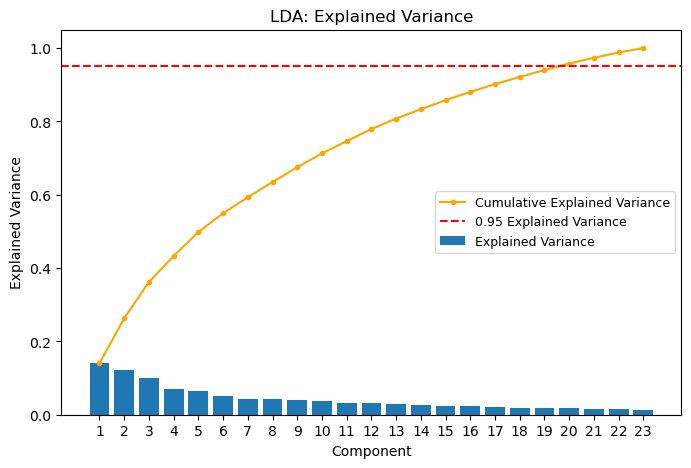

In [101]:
#getting explained variance ratio from the lda model 
evr = lda.explained_variance_ratio_
components = range(1, len(evr) + 1)

#plotting scree plot
fig, ax = plt.subplots(figsize = (8,5))
ax.bar(x = components, height = evr, label = 'Explained Variance');
plt.plot(components, np.cumsum(evr), marker = '.', color = 'orange', label = 'Cumulative Explained Variance')
plt.axhline(y = .95, color = 'r', linestyle = '--', label = '0.95 Explained Variance')
plt.xticks(range(1, len(evr)+1));
plt.title('LDA: Explained Variance');
plt.xlabel('Component');
plt.ylabel('Explained Variance');
plt.legend(fontsize = 9);

Looking at the plot above, it can be interpreted that there is an elbow at around component 3 - 5, however, this would only account for about .35 - .55 of the cumulative variance explained. As a result, for the purposes of modeling, all components resulted from the LDA computation will be used. 

This results in a dimensionality reduction of 784 to 23. 

In [102]:
#fit on training data and transform
X_train = lda.fit_transform(X_train,y_train)
X_test = lda.transform(X_test)

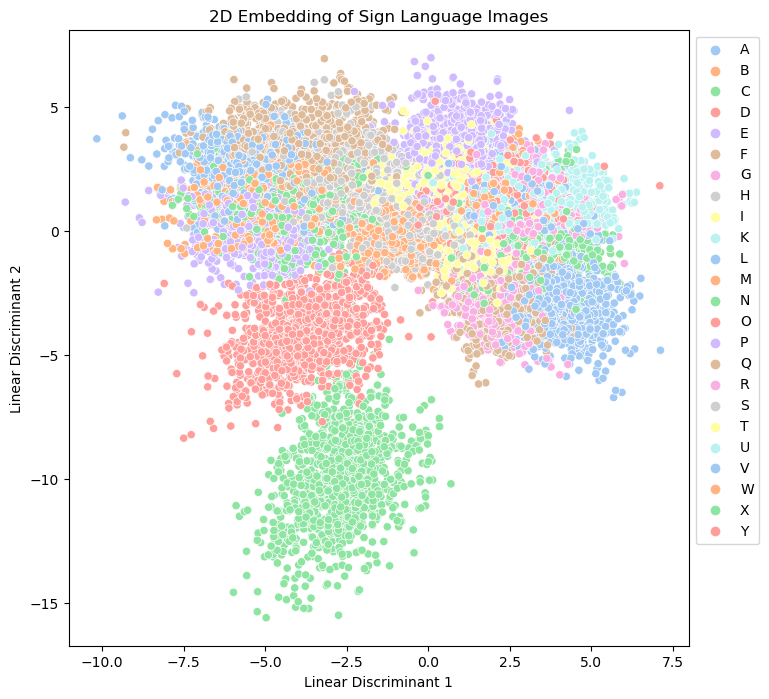

In [128]:
fig, ax = plt.subplots(figsize = (8,8))
ax = sns.scatterplot(x = X_train[:,0], y = X_train[:,1], hue = y_train, palette = 'pastel');
handler, _ = ax.get_legend_handles_labels();
plt.legend(handler, letters, bbox_to_anchor = (1, 1));
plt.title('2D Embedding of Sign Language Images')
plt.xlabel('Linear Discriminant 1');
plt.ylabel('Linear Discriminant 2');